# Demonstrate the use of the Elbow Curve method in portfolio management 

1. Choose any SA Equity portfolio - we'll use the Bateleur BCI SA Equity (A1)
2. The objecive is to find the optimal number of assets that this portfolio can hold. 

# Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
# plt.style.use('seaborn-ticks')

# Download the data

In [3]:
# Date range
start = '2024-01-01'
end = '2024-12-31'

# Tickers of assets
assets = asset_classes = pd.read_csv("assets_sample34.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])

# market_index = ['^J433.JO']

all_assets = assets 
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  33 of 33 completed


# Calculate the returns

In [4]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,AFE.JO,AIP.JO,ANH.JO,ARI.JO,AVI.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,NTC.JO,PMR.JO,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TRU.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03 00:00:00+00:00,-0.0045,-0.0010,0.0063,-0.0320,-0.0135,-0.0155,-0.0208,0.0193,-0.0188,-0.0238,...,0.0057,-0.0002,0.0214,-0.0198,-0.0226,-0.0200,-0.0146,-0.0039,0.0166,-0.0150
2024-01-04 00:00:00+00:00,0.0121,-0.0123,0.0042,0.0096,-0.0017,-0.0026,-0.0052,0.0128,-0.0242,0.0069,...,-0.0185,0.0000,0.0141,0.0048,0.0028,0.0037,-0.0148,0.0104,-0.0007,-0.0302
2024-01-05 00:00:00+00:00,0.0061,0.0000,-0.0034,0.0047,-0.0054,-0.0086,0.0077,0.0058,0.0005,-0.0019,...,0.0065,-0.0233,-0.0077,0.0029,-0.0083,0.0083,0.0203,0.0070,-0.0017,0.0120
2024-01-08 00:00:00+00:00,-0.0017,0.0007,0.0130,-0.0208,0.0056,-0.0145,-0.0040,0.0006,0.0085,0.0032,...,0.0094,0.0081,-0.0091,0.0033,-0.0055,0.0044,0.0181,-0.0314,-0.0327,0.0069
2024-01-09 00:00:00+00:00,0.0018,0.0168,-0.0030,-0.0033,-0.0009,-0.0101,0.0041,-0.0009,0.0058,-0.0095,...,-0.0036,0.0000,-0.0163,-0.0069,-0.0067,0.0059,-0.0144,0.0110,0.0235,0.0194


# Calculate the standard deviation (as a rsik measure) and compute the expected risks.

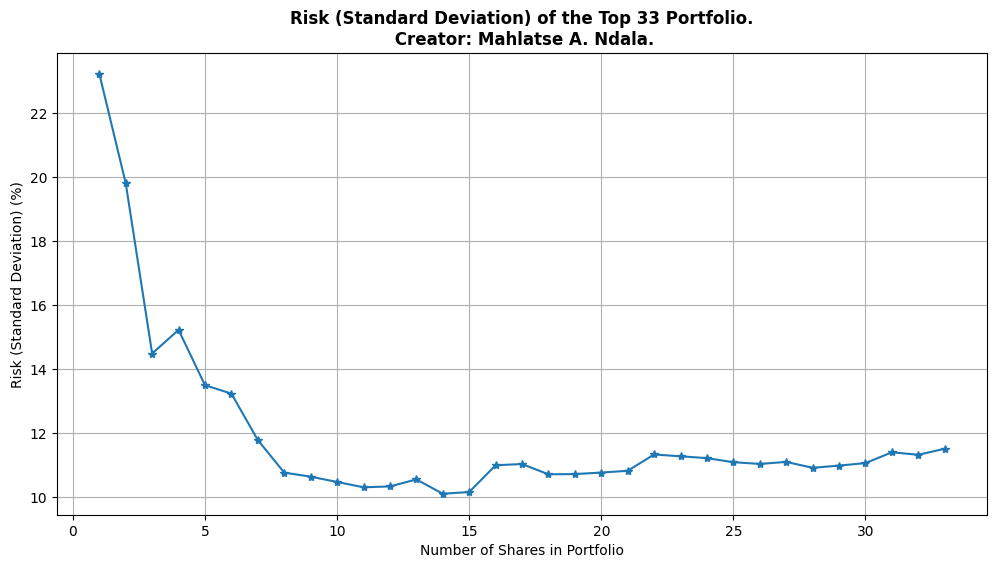

1     23.228
2     19.804
3     14.477
4     15.216
5     13.487
6     13.223
7     11.771
8     10.752
9     10.625
10    10.460
11    10.293
12    10.320
13    10.539
14    10.092
15    10.144
16    10.983
17    11.020
18    10.699
19    10.706
20    10.754
21    10.809
22    11.320
23    11.262
24    11.205
25    11.078
26    11.024
27    11.087
28    10.903
29    10.972
30    11.050
31    11.388
32    11.310
33    11.500
dtype: float64

In [7]:
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(data):

    """
    Calculate standard deviation for portfolios with increasing numbers of shares and visualize the results.

    Args:
    shares_symbols (list): A list of shares symbols

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of shares.
    """

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of shares in each portfolio
    number_of_shares = np.arange(1, len(Y.columns)+1)

    # Iterate through each portfolio
    for num_shares in number_of_shares:
        # Create equal weights for each constituent in the data
        weights = np.full(num_shares, 1/num_shares)

        # Extract data from whole dataset
        shares_data_subset = Y.iloc[:, :num_shares]

        # Create covariance matrix
        cov_mat = shares_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_shares] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(12, 6))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='*', linestyle='-')
    plt.title('Risk (Standard Deviation) of the Top 33 Portfolio.\n Creator: Mahlatse A. Ndala.', fontweight='bold')
    plt.xlabel('Number of Shares in Portfolio')
    plt.ylabel('Risk (Standard Deviation) (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:40]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(data)
elbow_curve